# Exploratory Data Analysis

The Objective is to study the data and extract insights

In [1]:
import pandas as pd
from utilities.load_authors_data import load_authors_data
from utilities.clean_tweets import clean_tweets
path = "data/pan15/english/"
df = load_authors_data(path)

In [2]:
from utilities.clean_tweets import clean_tweets
#df["tweets"] = df["tweets"].apply(lambda text: clean_tweets(text))

In [3]:
df.head()

,gender,age_group,extraverted,stable,agreeable,conscientious,open,tweets
user552,M,25-34,0.3,0.5,0.1,0.2,0.2,[How to Test Your Startup Idea for $50 http://...
user865,M,25-34,0.2,0.4,0.2,0.0,0.2,[Everyday I come up with a new optimum solutio...
user103,M,18-24,0.1,0.2,0.1,0.1,0.1,[@username @username @username @username #IfM...
user179,F,18-24,0.1,0.1,-0.1,0.5,0.1,"[I wish we could talk forever.\t\t, 100000 thi..."
user321,F,18-24,0.0,-0.1,0.1,0.3,0.4,"[icarly ^^\t\t, thuis<3\t\t, Homework finished..."


In [4]:
df.describe()

,gender,age_group,extraverted,stable,agreeable,conscientious,open,tweets
count,152,152,152,152,152,152,152,152
unique,2,4,9,9,9,8,7,152
top,F,25-34,0.1,0.2,0.2,0.1,0.1,"[I'm at IKO (Modena, Italy) http://t.co/OAqoxw..."
freq,76,60,41,37,46,38,47,1


## Personality Traits Distribution

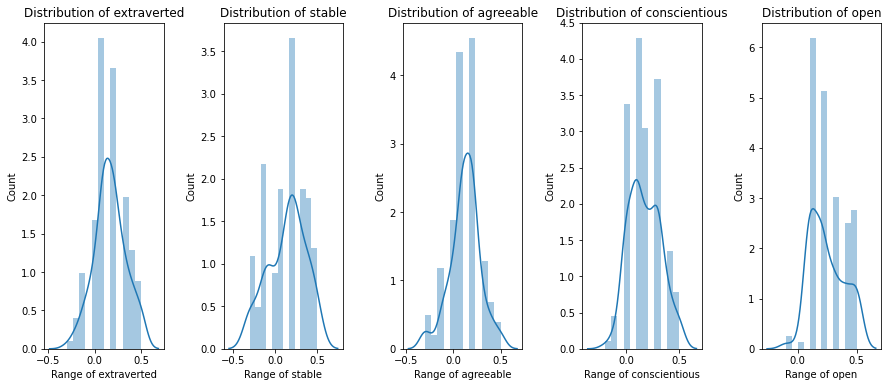

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['extraverted' , 'stable' , 'agreeable','conscientious','open']:
    n += 1
    plt.subplot(1 , 5 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x],bins = 12)
    plt.title('Distribution of {}'.format(x))
    plt.xlabel('Range of {}'.format(x))
    plt.ylabel('Count')
plt.show()

Here, In the above Plots we can see the Distribution pattern of the personality traits of the users, By looking at the plots,we can infer one thing that:

Most users see themselves in the positive side of stable, Agreeable, conscientious and open. And quite Neutral when it comes to extravert

## Gender Distribution

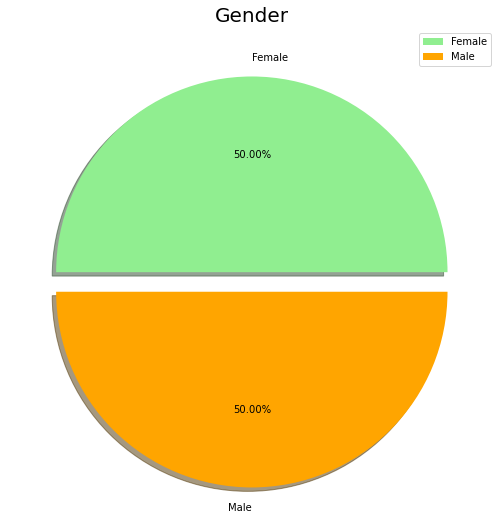

In [6]:
genders=df.gender.value_counts()

labels = ['Female', 'Male']
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(genders, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# fig1, ax1 = plt.subplots()
# ax1.pie(genders, labels=["Male","Female"], autopct='%1.1f%%')
# ax1.axis('equal')
# plt.show()

By looking at the above pie chart which explains about the distribution of Gender in the dataset 

The population is 50% Male and 50% Female

## Age range distribution

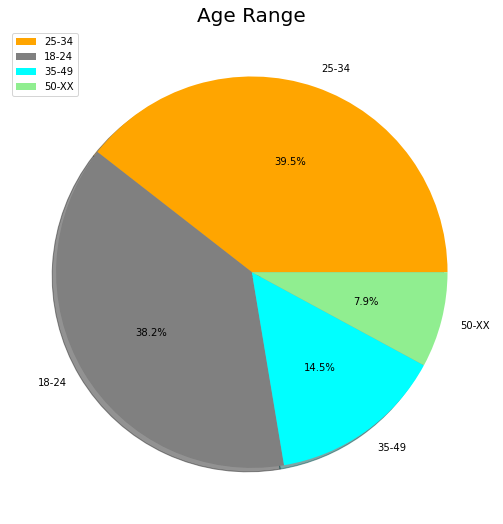

In [7]:
age_groups=df.age_group.value_counts()
colors = ['orange','grey','cyan','lightgreen']
fig1, ax1 = plt.subplots()
ax1.pie(age_groups, labels=df.age_group.unique(), colors = colors, shadow = True, autopct='%1.1f%%')
ax1.axis('off')
plt.title('Age Range', fontsize = 20)
plt.legend()
plt.show()

## WordCloud by Gender

### Female

In [8]:
females=df.loc[df['gender']=='F']
females.head()

,gender,age_group,extraverted,stable,agreeable,conscientious,open,tweets
user179,F,18-24,0.1,0.1,-0.1,0.5,0.1,"[I wish we could talk forever.\t\t, 100000 thi..."
user321,F,18-24,0.0,-0.1,0.1,0.3,0.4,"[icarly ^^\t\t, thuis<3\t\t, Homework finished..."
user666,F,35-49,0.1,0.4,0.5,0.5,0.3,[@username @username grandes coaches http://t....
user625,F,25-34,0.0,-0.2,-0.3,0.3,0.2,[Made south western lasagna and a strawberry p...
user35,F,18-24,0.2,0.3,0.3,0.2,0.3,"[Snapchat: ximefr\t\t, It's no fun but I've be..."


In [9]:
test = females["tweets"]["user179"]
test

['I wish we could talk forever.\t\t',
 "100000 things I want to say... But it's better I keep my mouth shut.\t\t",
 'Those dreams where the feeling you have is the best thing.\t\t',
 '"If you want it, then you got it..."\t\t',
 'That was cute. #mademesmile\t\t',
 'Prettymuch to die for....\t\t',
 'Wish I could say everything....\t\t',
 'I want chocolate milk.\t\t',
 '"Don\'t take me the wrong way... But..."\t\t',
 'Shit I missed 11:11. Oh well I have you\t\t',
 "Shouldn't have thunk it :)\t\t",
 '"Now your sad and creepy."\t\t',
 "I'm fine with three. :)\t\t",
 "Only some people will understand my tweets... Others will think I'm insane.\t\t",
 "I didn't mean to think about it... My mind just ran off, but I like the new place its in.\t\t",
 'Keeping under control....\t\t',
 'One thing that just makes me want to punch a baby is child abuse.\t\t',
 "Don't take anything I say too seriously... But seriously, sometimes I can be serious... Then you better seriously understand me.\t\t",
 '#eas

In [17]:
from utilities.clean_tweets import clean_tweets
females["tweets_as_text"] = females["tweets"].apply(lambda tweets: " ".join(tweets))
all_females_tweets =" ".join(females.tweets_as_text.values)
all_females_tweets_cleaned = clean_tweets(all_females_tweets)
all_females_tweets_cleaned

'wish could talk forever 100000 things want say better keep mouth shut dreams feeling best thing if want it got it cute mademesmile prettymuch die for wish could say everything want chocolate milk dont take wrong way but shit missed 1111 oh well thunk now sad creepy i am fine three people understand tweets others think i am insane mean think it mind ran off like new place in keeping control one thing makes want punch baby child abuse take anything say seriously seriously sometimes serious better seriously understand me easilyattractedto guys cute smile know use it yeah put back there doctors remove colon world like dead morning fine i am finer chocolate milk salami sandwitch carrots eaten today bagel sounding pretty damn good right freezing thumbs way home text worth it well depressing hate saying goodbye alot dumbass cant believe said that damn cute aw cant believe said homeless shelter no wanna write really hate feeling lets think it dude boyfriend  like last girlfrien cheat by way c

### Male

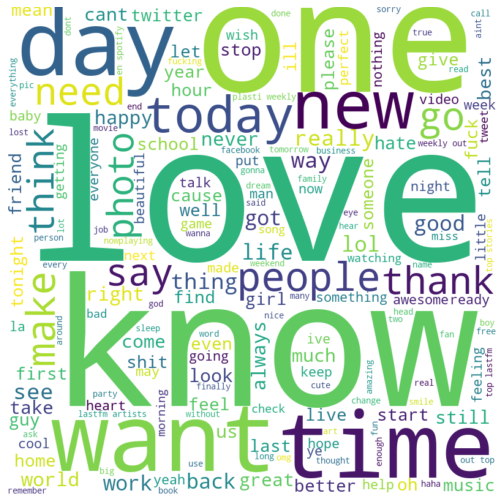

In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_females_tweets_cleaned)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
males=df.loc[df['gender']=='M']
males.head()

,gender,age_group,extraverted,stable,agreeable,conscientious,open,tweets
user552,M,25-34,0.3,0.5,0.1,0.2,0.2,[How to Test Your Startup Idea for $50 http://...
user865,M,25-34,0.2,0.4,0.2,0.0,0.2,[Everyday I come up with a new optimum solutio...
user103,M,18-24,0.1,0.2,0.1,0.1,0.1,[@username @username @username @username #IfM...
user283,M,18-24,0.3,0.3,0.2,0.1,0.2,[Nah Puyol would get a jab in the lip for that...
user565,M,18-24,0.1,0.2,0.3,0.1,0.2,"[RT ""@username: WHEN YOU TELL GRANDPA 60'S MUS..."


In [14]:
from utilities.clean_tweets import clean_tweets
males["tweets_as_text"] = males["tweets"].apply(lambda tweets: " ".join(tweets))
all_males_tweets =" ".join(males.tweets_as_text.values)
all_males_tweets_cleaned = clean_tweets(all_males_tweets)
all_males_tweets_cleaned

'test startup idea 50 quoted storify story new story new story storify caceroludos quoted storify story caceroludos quoted storify story caceroludos quoted storify story caceroludos business models commodity stop asking but make money combinator alum flutter raises 14 million gesture recognition tech montreal protests 4 months photos atlantic i want archieve immortality work want achieve dying woody allen por comer en la oficina lvk  st andrews take easy  i am aeroparque jorge newbery aep ciudad de buenos aires w 7 others  klout score decent i am 53 check profile today posted photo posted photo torrar  i am aeroparque jorge newbery aep w unlocked swarm badge  posted photo los yankis bailan cuarteto pero despasito   edinburgh castle w 3 others lot people pride posted photo posted photo posted photo posted photo i am powell street cable car turnaround san francisco ca w 2 others i am san francisco pride san francisco ca w 52 others i am civic center plaza san francisco ca w 23 others pos

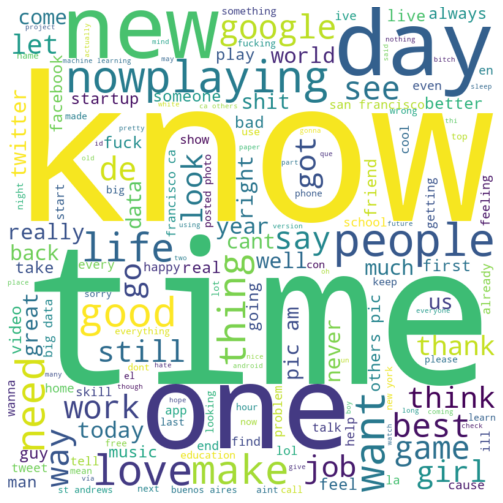

In [15]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_males_tweets_cleaned)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

 ## Wordcloud by Age Range

### 20's Users

In [20]:
twenties =df.loc[df['age_group']=='18-24']

from utilities.clean_tweets import clean_tweets

twenties["tweets_as_text"] = twenties["tweets"].apply(lambda tweets: " ".join(tweets))

twenties_tweets =" ".join(twenties.tweets_as_text.values)
twenties_tweets_cleaned = clean_tweets(twenties_tweets)
twenties_tweets_cleaned

'ifmynamewas yashchopra id name lead abhinav instead rahul raj films xd ifmynamewas id catch ol pokemon n hv battles n batch connect myspace ifmynamewas id make teaching java taking exams illegal college ifmynamewas allauddin khilji id spare nalanda n burn engineeringcollege university bangaloreon sunday nomoreexams gonna result winner ifmynamewas yash chopra  id change lead name abhinav rahul raj movies aye hero topper kidher h atleast dont tag mr nonexistant herehe inventor java hey bday weekend whts gift xd hey required work fb well ifmynamewas  someone plzz utha lo meri java wali psycho maam koo pain ass bahut sari dua milegi ifmynamewas george w bushid punish college teachers give students freedom iraq2006 proffsucks xd name twitter  id block tweets bombay pune  flood abhinav rajs tweet ifmynamewas vijay malya  id never put 14cr yuvraj singh ipl rcb i am backing raina playerbattles vote choice pepsiipl yes shayad ask prizes stage 1 d badges unlocked outside bad website good badge 

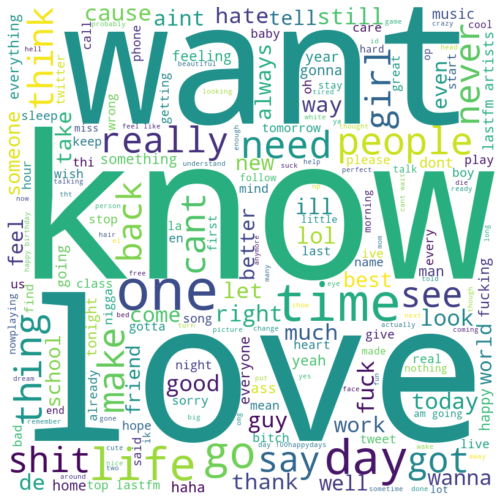

In [21]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(twenties_tweets_cleaned)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### thirties

In [22]:
twenties =df.loc[df['age_group']=='25-34']

from utilities.clean_tweets import clean_tweets

twenties["tweets_as_text"] = twenties["tweets"].apply(lambda tweets: " ".join(tweets))

twenties_tweets =" ".join(twenties.tweets_as_text.values)
twenties_tweets_cleaned = clean_tweets(twenties_tweets)
twenties_tweets_cleaned

'test startup idea 50 quoted storify story new story new story storify caceroludos quoted storify story caceroludos quoted storify story caceroludos quoted storify story caceroludos business models commodity stop asking but make money combinator alum flutter raises 14 million gesture recognition tech montreal protests 4 months photos atlantic i want archieve immortality work want achieve dying woody allen por comer en la oficina lvk  st andrews take easy  i am aeroparque jorge newbery aep ciudad de buenos aires w 7 others  klout score decent i am 53 check profile today posted photo posted photo torrar  i am aeroparque jorge newbery aep w unlocked swarm badge  posted photo los yankis bailan cuarteto pero despasito   edinburgh castle w 3 others lot people pride posted photo posted photo posted photo posted photo i am powell street cable car turnaround san francisco ca w 2 others i am san francisco pride san francisco ca w 52 others i am civic center plaza san francisco ca w 23 others pos

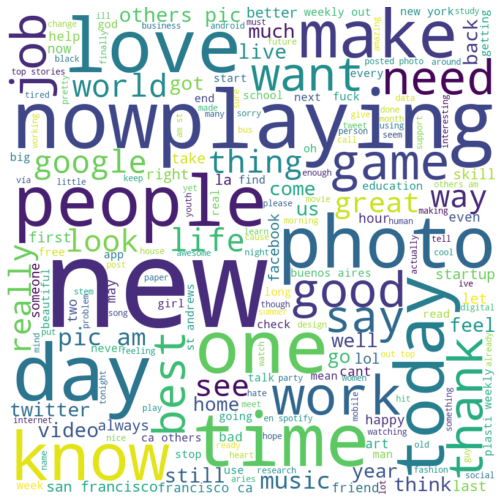

In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(twenties_tweets_cleaned)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Fourties

In [24]:
twenties =df.loc[df['age_group']=='35-49']

from utilities.clean_tweets import clean_tweets

twenties["tweets_as_text"] = twenties["tweets"].apply(lambda tweets: " ".join(tweets))

twenties_tweets =" ".join(twenties.tweets_as_text.values)
twenties_tweets_cleaned = clean_tweets(twenties_tweets)
twenties_tweets_cleaned

'grandes coaches way go congrats  love write wish could half talent express feelings writing remembre takes one negative comment kill dream think someone share you “ really improve emotional intelligence works si muchas grax kindness language deaf hear blind see mark twain logic get b imagination take everywhere albert einstein smart answer the artist nothing without gift gift nothing without work emile zola sigo con mi country music sugarland happenssugarland  happens live cma fest 2009 jugar solitario antes de decidir “why might make better decision quick game solitaire could accomplish one thing right now would be si sólo pudieras realizar una cosa en este momento que sería goals beauty mirror light heart quote knowing want first step toward getting it spend time family friends dopamine “ happiness something ready made comes actions dalai lama” muchas gracias charly mucho gusto larry “ 70 women ask questions already know answer to best simply tell truth” “ many chapters life get los

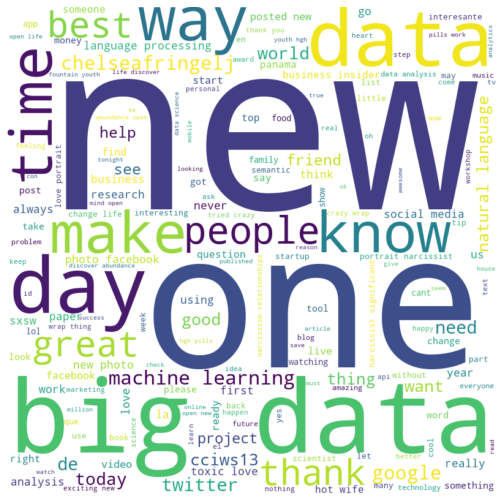

In [25]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(twenties_tweets_cleaned)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Fivties

In [27]:
twenties =df.loc[df['age_group']=='50-XX']

from utilities.clean_tweets import clean_tweets

twenties["tweets_as_text"] = twenties["tweets"].apply(lambda tweets: " ".join(tweets))

twenties_tweets =" ".join(twenties.tweets_as_text.values)
twenties_tweets_cleaned = clean_tweets(twenties_tweets)
twenties_tweets_cleaned

'please check twitter dm box photoedit  nikki forever young baby  wished happy belated birthday thank much nita  “ robbin ratt circa 1983 love pic playin custom red v modernvintage stars photoedit army 1111 saturdaymake wish come trüe  happy caturday kickstartmyheart “ cant better tomorrow always thinking yesterday” wished happy birthday dec 4 thank you joy  pic one latest edits generation swine era always been wanna live life terms gotta willing crash  burn lyric mysticism everyone know earth refreshing several times street meets 90s meet  greets 2ks show 552014 hold breath photoedit  among things yeah best photoedits come feeling bit crazy © i am still waiting years ohhh hahaha thought lol private thought thank you private thought necessarily nice yeh evvaune iz suxx baby betta get ur label id climb stairz mah love please like work you made it sister visitation rights matter what shaman wrote lyrics shaman sings awesome shit kid m nowplaying rocketship  mötley crüe generation swine  

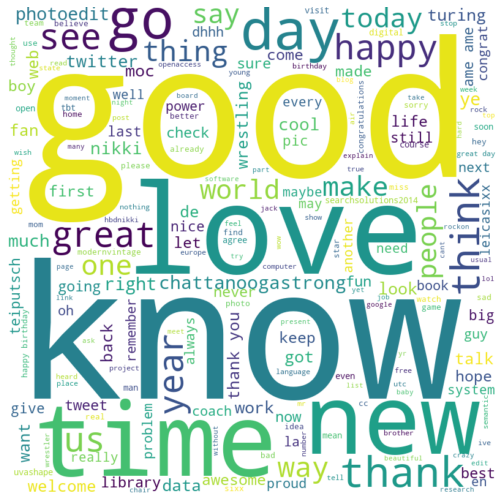

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(twenties_tweets_cleaned)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Observations

- **Girls:** 
interested in pictures and photos

- **Boys:**
games



- **18-24:**
many redundant words but some are very prominent (want, know, love) + use of bad words

- **25-34:**
many redundant words but topic oriented (work, games, photos, love)

- **35-49:**
less redundant words (may also be explained by the unbalance distribution of age) : news, IT and innovations (ML, big data)

- **50+:**
small redundant  vocabulary (may also be explained by the unbalance distribution of age)  : maybe how to spend good time (great, happy, library, time)
